Autoencoder

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
Reshape, LeakyReLU as LR,\
Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten, Activation
from tensorflow.keras.models import Model, Sequential

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
InputModel = Input(shape=(28,28))
EncodedLayer = Dense(32, activation='relu')(InputModel)
DecodedLayer = Dense(28, activation='sigmoid')(EncodedLayer)
AutoencoderModel = Model(InputModel, DecodedLayer)
# we can summarize our model.
AutoencoderModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 dense (Dense)               (None, 28, 32)            928       
                                                                 
 dense_1 (Dense)             (None, 28, 28)            924       
                                                                 
Total params: 1,852
Trainable params: 1,852
Non-trainable params: 0
_________________________________________________________________


In [5]:
AutoencoderModel.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
history = AutoencoderModel.fit(x_train, x_train,

batch_size=256,
epochs=100,
shuffle=True,
validation_data=(x_test, x_test))

# Make prediction to decode the digits
DecodedDigits = AutoencoderModel.predict(x_test)

Epoch 1/100
235/235 [==============================] - 11s 34ms/step - loss: 0.7118 - val_loss: 0.7120
Epoch 2/100
235/235 [==============================] - 4s 17ms/step - loss: 0.7109 - val_loss: 0.7110
Epoch 3/100
235/235 [==============================] - 4s 18ms/step - loss: 0.7099 - val_loss: 0.7099
Epoch 4/100
235/235 [==============================] - 3s 13ms/step - loss: 0.7087 - val_loss: 0.7087
Epoch 5/100
235/235 [==============================] - 3s 12ms/step - loss: 0.7076 - val_loss: 0.7075
Epoch 6/100
235/235 [==============================] - 3s 13ms/step - loss: 0.7063 - val_loss: 0.7062
Epoch 7/100
235/235 [==============================] - 4s 17ms/step - loss: 0.7050 - val_loss: 0.7048
Epoch 8/100
235/235 [==============================] - 3s 13ms/step - loss: 0.7037 - val_loss: 0.7034
Epoch 9/100
235/235 [==============================] - 3s 12ms/step - loss: 0.7023 - val_loss: 0.7020
Epoch 10/100
235/235 [==============================] - 3s 13ms/step - loss: 0.70

In [7]:
DecodedDigits = AutoencoderModel.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [8]:
def plotmodelhistory(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Autoencoder Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

dict_keys(['loss', 'val_loss'])


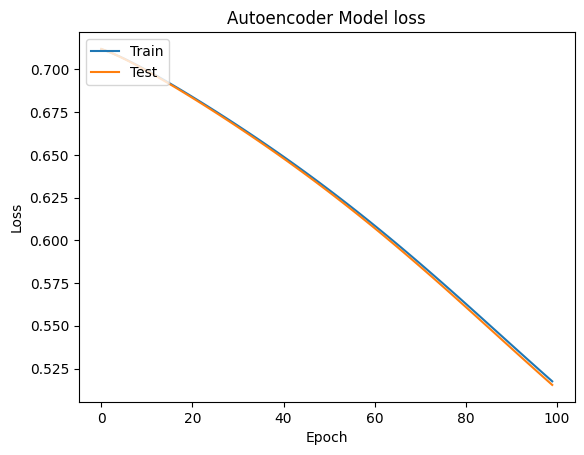

In [9]:
# list all data in history
print(history.history.keys())
# visualization of the loss minimization during the training process
plotmodelhistory(history)

In [10]:
# Acquire MNIST data
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [11]:
# Reshape data for an MLP input
import numpy as np
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))

In [12]:
# Normalize data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
print(train_images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [13]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense

In [14]:
input_dim = 28*28
latent_vec_dim = 16
input_layer = Input(shape=(input_dim,))

In [15]:
# Define the autoencoder architecture
# First build the encoder
enc_layer_1 = Dense(latent_vec_dim, activation='tanh')(input_layer)
encoder = enc_layer_1
# Then build the decoder
dec_layer_1 = Dense(input_dim, activation='sigmoid')(encoder)
decoder = dec_layer_1
# Connect both encoder and decoder
autoencoder = Model(input_layer, decoder)
# Latent representation (Optional)
latent_model = Model(input_layer, encoder)
# Get summary
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 16)                12560     
                                                                 
 dense_3 (Dense)             (None, 784)               13328     
                                                                 
Total params: 25,888
Trainable params: 25,888
Non-trainable params: 0
_________________________________________________________________


In [16]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [17]:
history = autoencoder.fit(train_images, train_images, epochs=70,
validation_data=(test_images, test_images))

Epoch 1/70
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2831 - val_loss: 0.2633
Epoch 2/70
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2632 - val_loss: 0.2627
Epoch 3/70
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2630 - val_loss: 0.2622
Epoch 4/70
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2493 - val_loss: 0.2448
Epoch 5/70
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2333 - val_loss: 0.2222
Epoch 6/70
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2196 - val_loss: 0.2119
Epoch 7/70
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2071 - val_loss: 0.2042
Epoch 8/70
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2035 - val_loss: 0.2023
Epoch 9/70
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1984 - val_loss: 0.1922
Epoch 10/70
1875/1875 [==============================] - 5s 3ms/step - loss: 0.188

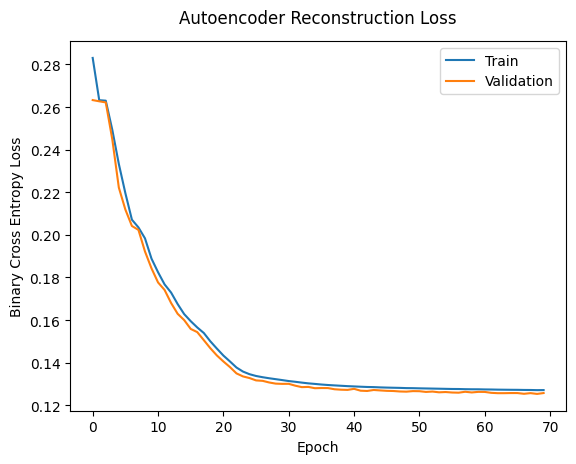

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

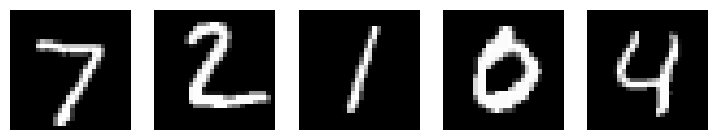

In [19]:
n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')
plt.show()

313/313 [==============================] - 0s 1ms/step


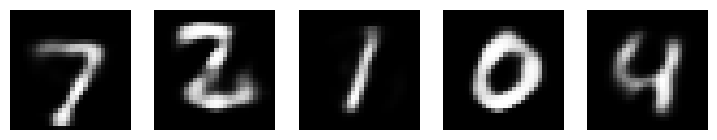

In [20]:
# Testing the model by reconstructing
reconstructed_images = autoencoder.predict(test_images)

n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')
plt.show()

STACKED ENCODER

Epoch 1/10
235/235 [==============================] - 7s 26ms/step - loss: 0.1883 - val_loss: 0.1120
Epoch 2/10
235/235 [==============================] - 7s 29ms/step - loss: 0.1021 - val_loss: 0.0927
Epoch 3/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0897 - val_loss: 0.0851
Epoch 4/10
235/235 [==============================] - 7s 29ms/step - loss: 0.0840 - val_loss: 0.0822
Epoch 5/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0808 - val_loss: 0.0793
Epoch 6/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0787 - val_loss: 0.0771
Epoch 7/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0771 - val_loss: 0.0756
Epoch 8/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0758 - val_loss: 0.0747
Epoch 9/10
235/235 [==============================] - 6s 24ms/step - loss: 0.0747 - val_loss: 0.0739
Epoch 10/10
313/313 [==============================] - 1s 3ms/step


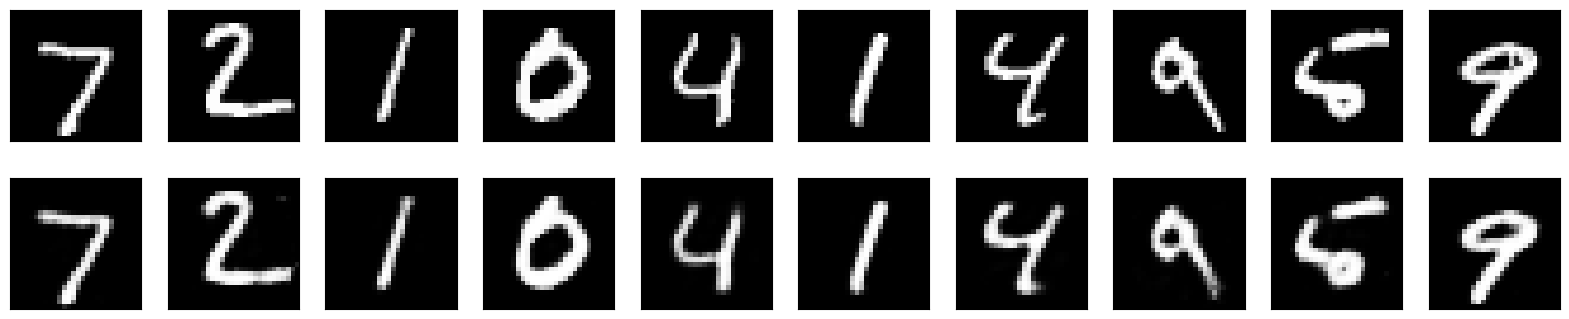

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten the input data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

# Define the stacked encoder autoencoder architecture
model = Sequential()

# Encoder layers
model.add(Dense(units=256, activation='relu', input_shape=(784,)))
model.add(Dense(units=128, activation='relu'))

# Decoder layers
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=784, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
model.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test))

# Generate reconstructed images
reconstructed_images = model.predict(x_test)

# Display original and reconstructed images
import matplotlib.pyplot as plt

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
